# Classification algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import tarfile
import urllib 
import pandas as pd
import seaborn as sns
 
# Use pandas to retrieve data file
url = 'https://raw.githubusercontent.com/danny-cohen/uw-cancer-ml/master/data.csv'
cancerdf = pd.read_csv(url,index_col=0)

In [2]:
cancerdf.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# make copy of original dataset
#cancerdf.info()
cancer = cancerdf.iloc[:,:-1].copy()
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [4]:
# convert the string label diagnosis ('M' or 'B') into boolean 1s and 0s
#cancer['diagnosis']=(cancer['diagnosis']=='M').astype(np.int)
#print("Percent of patients with malignant diagnosis",float(cancer.diagnosis.sum())/cancer.diagnosis.size)

# Create a training and test set, perform feature scaling/data preparation

In [5]:
from sklearn.model_selection import train_test_split
#from sklearn.base import clone 

X_train, X_test, y_train, y_test = train_test_split(cancer.drop("diagnosis",axis=1), cancer.diagnosis,\
                                                    test_size=0.3, shuffle=True, random_state=1)
#train_set, test_test = StratifiedShuffleSplit(df, test_size=0.25, random_state=42)
#split = StratifiedShuffleSplit ( n_splits = 1 , test_size = 0.2 , random_state = 42 ) 
#for train_index , test_index in split . split ( cancer , cancer [ "" ]): 


# X_train = train_set.drop("diagnosis",axis=1).loc[:,"radius_mean":"fractal_dimension_worst"]#iloc[[:,:-1] 
# y_train = train_set['diagnosis'].copy()
# X_test = test_set.drop("diagnosis",axis=1).loc[:,"radius_mean":"fractal_dimension_worst"] #iloc[[:,:-1] 
# y_test = test_set['diagnosis'].copy()

# features=train_set.drop("diagnosis",axis=1).iloc[:,:-1] # predictors (features)
# features.info()
# target=train_set['diagnosis'].copy()   # labels, target feature
#print(target)
#X_train.head(),y_train

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Clean data from NaNs, Inf, etc

In [7]:
# import seaborn as sns
# %pylab
# #fig=plt.figure(figsize=(15,20)
# fig,axs=plt.subplots(6,5,figsize=(10,5))
# #print("NUM FEATURES: ",np.size(features.keys()))
# c=0

# for j in range(axs.shape[0]):
#     for k in range(axs.shape[1]):
        
# #         f = X_train[:,c]
# #         fmed=np.nanmedian(f)
# #         fstd=np.nanstd(f)
# #         print(fmed-fstd,fmed+fstd)
# #         f[np.isnan(f)]=-1.0e5
#         #sns.distplot(features.iloc[:,c],bins=20,ax=axs[j,k])
#         axs[j,k].hist(X_train.iloc[:,c],bins=30)
#         axs[j,k].annotate(X_train.keys()[c],xy=(0.4,0.8),xycoords="axes fraction")
#         c+=1
        
#         if c==np.size(features.keys())-1:
#             break
  

## Train the classifier

#### First try stochastic gradient descent class

In [8]:
from sklearn import svm
#from sklearn.linear_model import SGDClassifier 

#sgd_clf = SGDClassifier(alpha=0.001,tol=0.0001,random_state=10)

svc_clf = svm.LinearSVC(C=1.0,dual=True,tol=0.0001,random_state=1)

#sgd_clf.fit(X_train,y_train)

svc_clf.fit(X_train_scaled,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [9]:
#from sklearn.svm import SVC
#svclf = SVC(C=1.0e3,max_iter=1000,random_state=42,tol=0.001,gamma='auto')
#svclf.fit(X_train.copy(), y_train.copy())


# Predictions and Cross-evaluation using test set

Average precision-recall score: 0.99
Confusion matrix: 
[[103   5]
 [  2  61]]


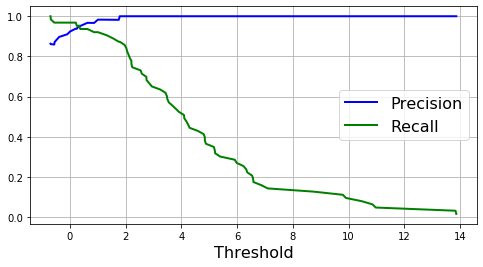

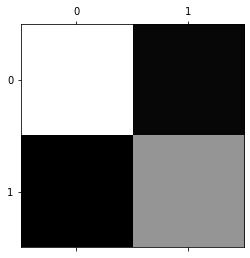

In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score,recall_score,f1_score,\
            average_precision_score,precision_recall_curve,confusion_matrix 

X_test_scaled=scaler.transform(X_test)

y_predict = svc_clf.predict(X_test_scaled)
y_score = svc_clf.decision_function(X_test_scaled)

precision, recall, threshold = precision_recall_curve(y_test, y_score, pos_label='M')

avg_precision = average_precision_score( y_test, y_score, pos_label='M')

cfmatrix = confusion_matrix( y_test, y_predict)
#print('Precision, recall, and threshold: ',precision,'\n',recall,'\n',threshold)
print('Average precision-recall score: {0:0.2f}'.format(
      avg_precision))
print('Confusion matrix: ')
print(cfmatrix)
# y_train_svc = cross_val_predict ( svc_clf , X_train , y_train , cv = 3 )#,verbose=0)
# y_score_svc=svc_clf.decision_function(X_test)


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):#, avg_precisions):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    #plt.plot(thresholds, avg_precisions, 'k-',label='Avg Prec',linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
   # plt.axis([-50000, 50000, 0, 1])             # Not shown
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)


plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precision, recall, threshold)#, avg_precision)
# plt.plot([7813, 7813], [0., 0.9], "r:")         # Not shown
# plt.plot([-50000, 7813], [0.9, 0.9], "r:")      # Not shown
# plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")# Not shown
# plt.plot([7813], [0.9], "ro")                   # Not shown
# plt.plot([7813], [0.4368], "ro")                # Not shown
#save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()

plt.matshow(cfmatrix, cmap=plt.cm.gray)

## Precision/Recall and Confusion matrix